In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN
from sklearn.metrics import matthews_corrcoef
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
import shap

In [36]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


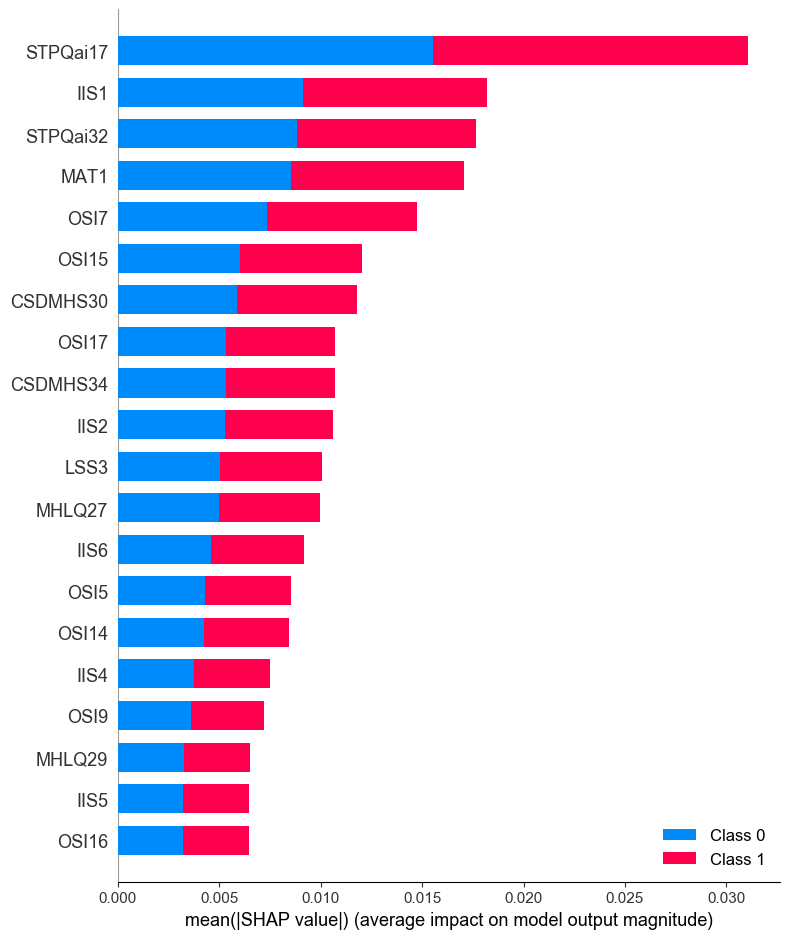

In [91]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-按量表维度-清洗处理后数据.csv"
Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

rfc = RandomForestClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train, y_train)

plt.rcParams["figure.figsize"] = (12, 8)

# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
# 调整图像大小
plt.figure(figsize=(8, 8))

# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=20)

# 保存SHAP总结图
# plt.savefig('shap_summary_plot.png', bbox_inches='tight')

# 关闭图像，以防在之后的代码中再次显示
plt.close()
    

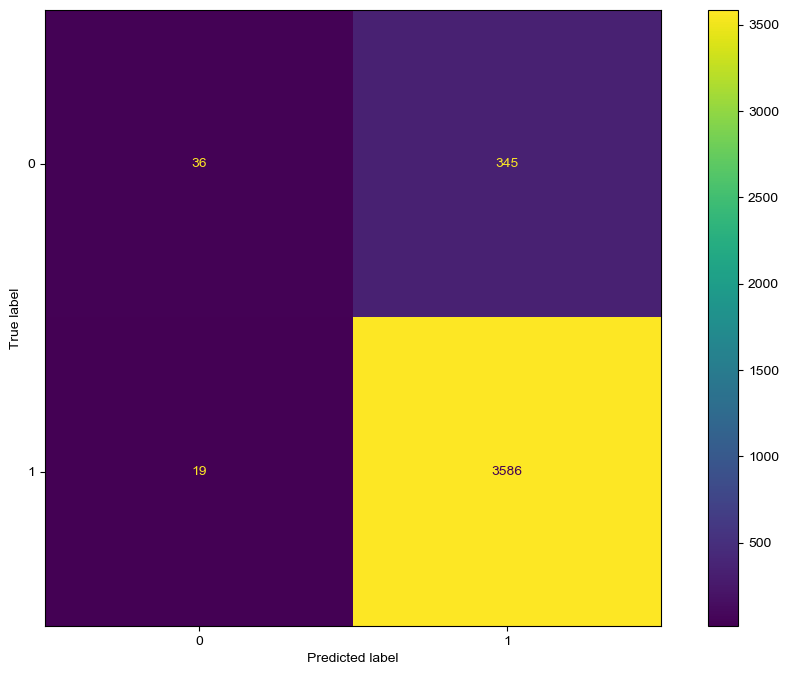

              precision    recall  f1-score   support

           0       0.65      0.09      0.17       381
           1       0.91      0.99      0.95      3605

    accuracy                           0.91      3986
   macro avg       0.78      0.54      0.56      3986
weighted avg       0.89      0.91      0.88      3986

Precision: 88.76%
Recall: 90.87%
Random Forest选择的重要特征: ['STPQai32' 'STPQawt1' 'IIS1' 'OSI7' 'CSDMHS34' 'STPQai17' 'STPQai18'
 'STPQawt2' 'STPQil9' 'IIS6' 'OSI17' 'PSQI4' 'PSQI41' 'CSDMHS30' 'IIS2'
 'OSI15' 'OSI14' 'IIS5' 'STPQoc24' 'OSI5' 'STPQpost3' 'PSQI31' 'MBIGS5'
 'OSI9' 'STPQawt5' 'STPQil2' 'LSS3' 'CSDMHS35' 'STPQpe18' 'IIS4']


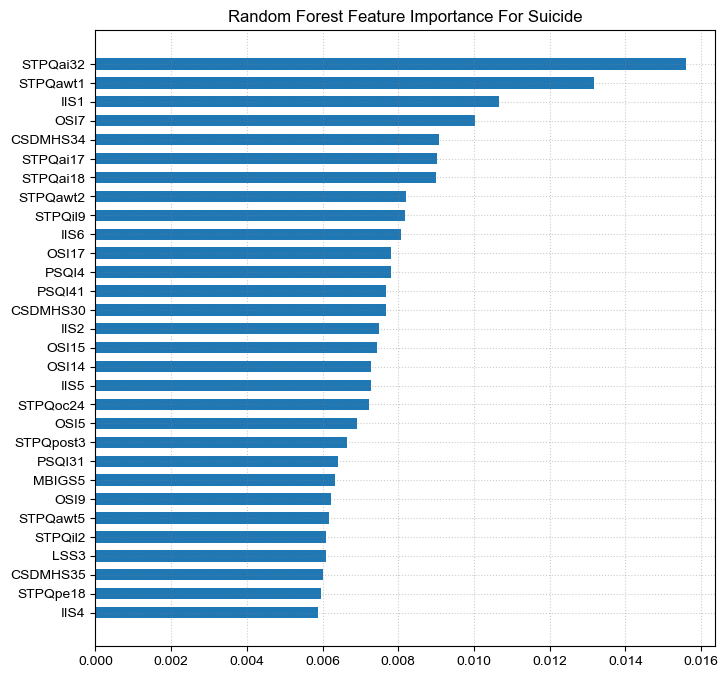

In [74]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x_train, y_train)
# print(Counter(y_res))

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

bbc.fit(x_train, y_train)

# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Suicide")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0: 6535, 1: 5725, 2: 788, 3: 236})
Matthews Correlation Coefficient: 0.42981168716991397
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1970
           1       0.63      0.71      0.67      1703
           2       0.36      0.02      0.03       246
           3       0.76      0.28      0.41        67

    accuracy                           0.69      3986
   macro avg       0.62      0.44      0.47      3986
weighted avg       0.67      0.69      0.67      3986

Precision: 67.31%
Recall: 68.89%
Random Forest选择的重要特征: ['OSI1' 'OSI5' 'OSI4' 'OSI9' 'OSI13' 'OSI11' 'OSI2' 'OSI7' 'OSI6' 'OSI12'
 'OSI3' 'OSI10' 'OSI15' 'OSI8' 'OSI18' 'OSI17' 'STPQawt2' 'LSS3'
 'STPQawt1' 'WFCS1' 'PSQI4' 'PSQI41' 'WFCS5' 'WFCS4' 'MBIGS4' 'MBIGS5'
 'PSQI2' 'STPQpe18' 'STPQpost16' 'LSS1']


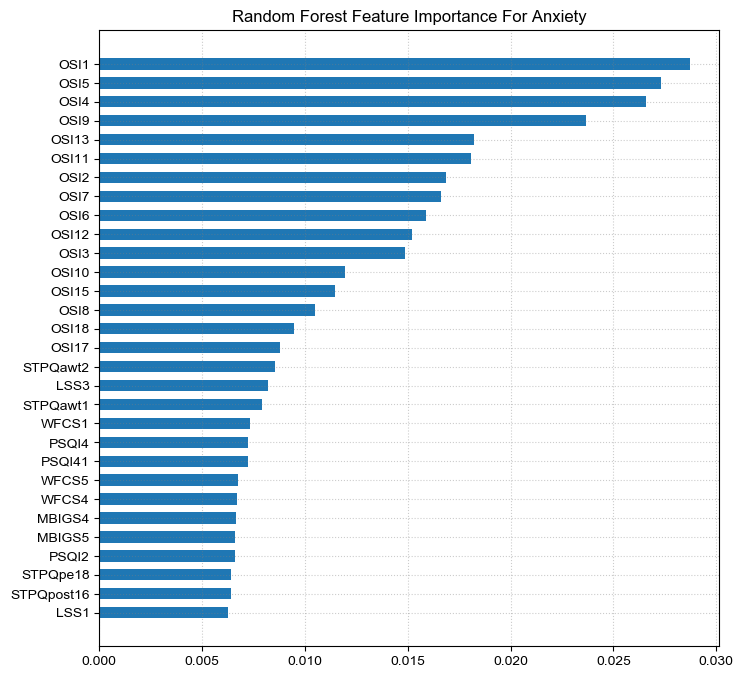

In [84]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)
y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# cc = SMOTEENN(random_state=random_state)
# X_res, y_res = cc.fit_resample(x, y)
# print(Counter(y_res))

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state,min_samples_split=2,min_samples_leaf=2)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()
y_pred = bbc.predict(x_test)

# 计算Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient:", mcc)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Anxiety")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0: 10920, 1: 2077, 2: 287})


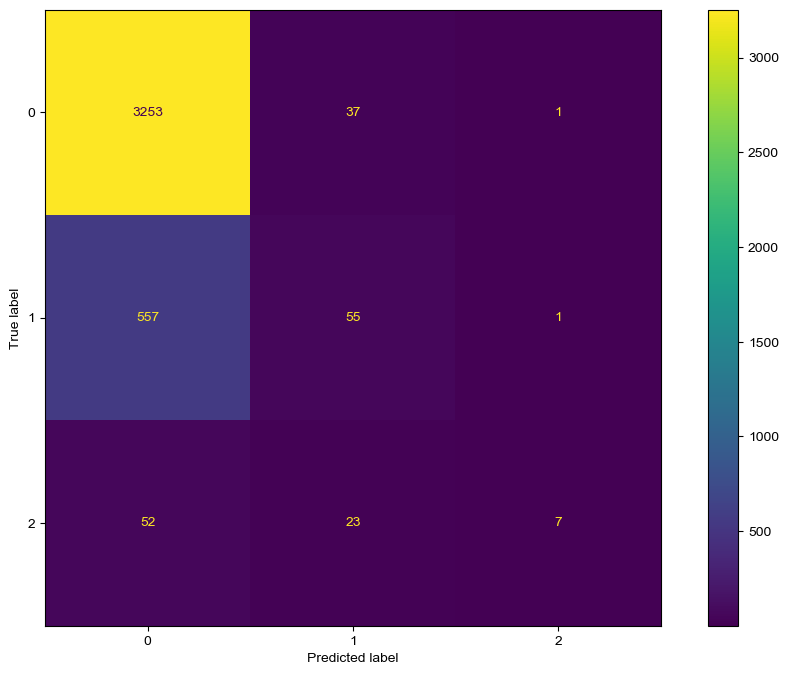

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3291
           1       0.48      0.09      0.15       613
           2       0.78      0.09      0.15        82

    accuracy                           0.83      3986
   macro avg       0.70      0.39      0.40      3986
weighted avg       0.78      0.83      0.78      3986

Precision: 78.50%
Recall: 83.17%
Random Forest选择的重要特征: ['OSI7' 'OSI11' 'OSI8' 'OSI4' 'OSI5' 'OSI9' 'OSI1' 'OSI12' 'OSI13' 'OSI3'
 'OSI6' 'OSI14' 'STPQawt1' 'OSI15' 'MBIGS5' 'STPQawt2' 'PSQI4' 'MBIGS8'
 'OSI16' 'PSQI41' 'OSI10' 'OSI17' 'WFCS10' 'OSI18' 'WFCS8' 'OSI2' 'MBIGS7'
 'MBIGS1' 'STPQpe18' 'MBIGS9']


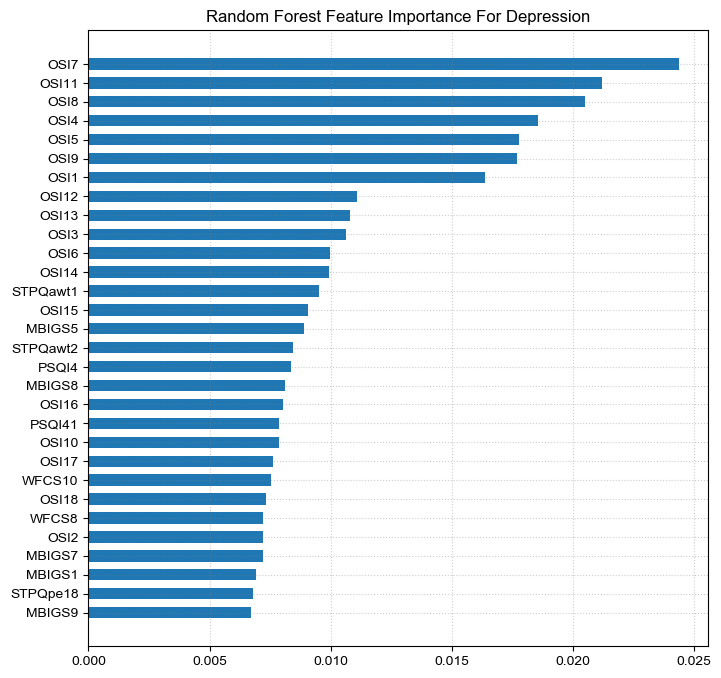

In [90]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x, y)
# print(Counter(y_res))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_leaf=2,min_samples_split=10,random_state=random_state)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Depression")
plt.savefig("前"+str(number)+"名特征")
plt.show()
